In [20]:
from user_space_generators import generate_aligned_user_space_mixed
from network_generators import SEQ_GENERATOR
import seaborn as sns
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

Casting Votes...: 100%|██████████| 100/100 [00:00<00:00, 16769.84it/s]


# Polarized Network Generator

In this Markdown, I'm excited to introduce the toy model generator I've developed. The generator incorporates multiple factors, aiming to reflect real-world social phenomena as the network is built. There are a few key elements to highlight. Let's begin with user spaces.

## User Spaces

User spaces represent topics where various opinions can form.

- A **non-polarized user space** is sampled from a normal distribution with values between -1 and 1. You can adjust the standard deviation of the distribution, but if this leads to values outside the range, they will be constrained to the nearest boundary.
  
- A **polarized user space** is sampled from a beta distribution with alpha and beta parameters both set to 0.5.

- A **normal user space** is sampled from a uniform distribution, with values ranging from -1 to 1.

**Note**: There is an alignment parameter. Increasing the alignment causes agents to adopt similar stances across topics. If the alignment parameter is low, agents will randomly shift their positions across topics.


### 1. `generate_user_space_uniform_discrete`

This function generates a matrix \( \mathbf{U} \in \mathbb{R}^{n_{\text{users}} \times n_{\text{opinion}}} \), where each element is randomly chosen from a set of discrete values, uniformly distributed between \(-1\) and \(1\).

Let:
- \( n_{\text{users}} \) be the number of users.
- \( n_{\text{opinion}} \) be the number of opinion dimensions.
- \( n_{\text{values}} \) be the number of discrete values, uniformly distributed between \([-1, 1]\).

The user matrix \( \mathbf{U} \) is generated as:

$$
\mathbf{U} = \text{reshape}\left( \mathbf{p}, (n_{\text{users}}, n_{\text{opinion}})\right)
$$

where \( \mathbf{p} \) is a vector of size \( n_{\text{users}} \times n_{\text{opinion}} \) where each element is randomly chosen from:

$$
 \mathbf{v} = \left[ -1, -1 + \frac{2}{n_{\text{values}} - 1}, \dots, 1 \right]
$$

via uniform sampling.

---

### 2. `generate_aligned_user_space_uniform`

This function generates a matrix \( \mathbf{U} \in \mathbb{R}^{n_{\text{users}} \times n_{\text{opinion}}} \) where the alignment of opinions across dimensions is controlled by the alignment strength. The opinion values are normally distributed around a set of core values for each user.

#### High Alignment:

- For each user \( i \), sample a core value \( c_i \) from a uniform distribution \( U(-1,1) \).
- The first opinion dimension is set to the core values.
- For each additional opinion dimension, sample a value from a normal distribution centered around \( c_i \) with a small variance \( \sigma^2 \).

For high alignment:

$$
U_{i,1} = c_i
$$

$$
U_{i,j} = \mathcal{N}(c_i, 0.05) \quad \text{for each} \quad j = 2, \dots, n_{\text{opinion}}
$$

#### Moderate Alignment:

For moderate alignment, increase the variance to 0.15:

$$
U_{i,j} = \mathcal{N}(c_i, 0.15) \quad \text{for each} \quad j = 2, \dots, n_{\text{opinion}}
$$

#### Low Alignment:

For low alignment, increase the variance further to 0.25:

$$
U_{i,j} = \mathcal{N}(c_i, 0.25) \quad \text{for each} \quad j = 2, \dots, n_{\text{opinion}}
$$

---

### 3. `generate_user_space_gaussian`

This function generates a matrix \( \mathbf{U} \in \mathbb{R}^{n_{\text{users}} \times n_{\text{opinion}}} \), where each element is sampled from a normal (Gaussian) distribution with mean 0 and standard deviation \( \sigma \).

Let:
- \( n_{\text{users}} \) be the number of users.
- \( n_{\text{opinion}} \) be the number of opinion dimensions.
- \( \sigma \) be the standard deviation of the normal distribution.

The matrix is generated by sampling each element from:

$$
U_{i,j} \sim \mathcal{N}(0, \sigma)
$$

The values are constrained to the range \([-1, 1]\). If any value exceeds this range, it is set to the nearest boundary:

$$
U_{i,j} = \begin{cases} 
  -1 & \text{if } U_{i,j} < -1 \\
  1 & \text{if } U_{i,j} > 1 \\
  U_{i,j} & \text{otherwise}
\end{cases}
$$

---

### 4. `generate_aligned_user_space_gaussian`

This function generates a matrix \( \mathbf{U} \in \mathbb{R}^{n_{\text{users}} \times n_{\text{opinion}}} \), where the alignment strength controls the variance of the normal distribution.

#### High Alignment:

- For each user \( i \), sample a core value \( c_i \sim \mathcal{N}(0, \sigma) \), constrained to \([-1, 1]\).
- The first opinion dimension is set to the core values.
- For each additional opinion dimension, sample a value from a normal distribution centered around \( c_i \) with a small variance \( 0.03 \).

For high alignment:

$$
U_{i,1} = c_i
$$

$$
U_{i,j} = \mathcal{N}(c_i, 0.03) \quad \text{for each} \quad j = 2, \dots, n_{\text{opinion}}
$$

#### Moderate and Low Alignment:

For moderate and low alignment, increase the variance to 0.9 and 0.2, respectively.

---

### 5. `generate_user_space_polarized`

This function generates a matrix \( \mathbf{U} \in \mathbb{R}^{n_{\text{users}} \times n_{\text{opinion}}} \), where the opinion values are drawn from a Beta distribution and scaled to fit within \([-1, 1]\).

Let:
- \( \alpha \) and \( \beta \) be the parameters of the Beta distribution.

For each opinion dimension, generate values using:

$$
U_{i,j} \sim \text{Beta}(\alpha, \beta)
$$

The values are then scaled to \([-1, 1]\) using:

$$
U_{i,j} = 2 \times (U_{i,j} - 0.5)
$$

---

### 6. `generate_aligned_user_space_polarized`

This function generates a matrix \( \mathbf{U} \in \mathbb{R}^{n_{\text{users}} \times n_{\text{opinion}}} \), where the alignment strength controls the variance of the normal distribution. The core values for each user are sampled from a Beta distribution.

---

### 7. `generate_user_space_mixed`

This function generates a mixed opinion space matrix \( \mathbf{U} \in \mathbb{R}^{n_{\text{users}} \times n_{\text{topics}}} \) with:

- \( n_{\text{non-polarized topics}} \)
- \( n_{\text{polarized topics}} \)
- \( n_{\text{normal topics}} \)

For non-polarized topics, values are drawn from a normal distribution:

$$
U_{i,j} \sim \mathcal{N}(0, 0.35)
$$

For polarized topics, values are drawn from a Beta distribution and scaled to fit \([-1, 1]\).

For normal topics, values are drawn from a uniform distribution:

$$
U_{i,j} \sim U(0,1)
$$

---

### 8. `generate_aligned_user_space_mixed`

This function generates a mixed opinion space matrix \( \mathbf{U} \in \mathbb{R}^{n_{\text{users}} \times n_{\text{topics}}} \), where the alignment strength controls the variance for each type of topic (non-polarized, polarized, normal).



## Similarity Matrix

Each user has opinions in $n$ number of topics. These topics can be polarized, non polarized and a normal topic or a combination of them. For $k$ users and $n$ topics, we have a user space with size $k \cdot n$ and a similarity matrix $k^2$. Similarity matrix contains the either euclidean distance or the dot product of every combination of users. 

### Function Explanation: `calculate_similarity`

This function calculates the pairwise similarity between users based on their positions in the user space using two methods: **Euclidean distance** or **dot product**. Below is the mathematical breakdown of each method and the normalization process.

#### 1. **Input Setup:**

The function begins by initializing a similarity matrix \( S \) of size \( n \times n \), where \( n \) is the number of users. Each element \( S[i,j] \) represents the similarity (or distance) between user \( i \) and user \( j \).

Let:
- \( \mathbf{u}_i \) be the opinion vector of user \( i \) in the user space.
- \( \mathbf{u}_j \) be the opinion vector of user \( j \).

#### 2. **Euclidean Distance Method:**

If the method selected is `'euc'`, the similarity is computed using the **Euclidean distance** between two users' opinion vectors. The Euclidean distance between user \( i \) and user \( j \) is given by:

\[
S[i,j] = \lVert \mathbf{u}_i - \mathbf{u}_j \rVert = \sqrt{\sum_{k=1}^{d} (u_{i,k} - u_{j,k})^2}
\]

Where:
- \( d \) is the number of opinion dimensions.
- \( u_{i,k} \) is the \( k \)-th opinion dimension of user \( i \).

#### 3. **Dot Product Method:**

If the method selected is `'dot'`, the similarity is computed using the **dot product** between two users' opinion vectors. The dot product between user \( i \) and user \( j \) is given by:

\[
S[i,j] = \mathbf{u}_i \cdot \mathbf{u}_j = \sum_{k=1}^{d} u_{i,k} \cdot u_{j,k}
\]

This method measures how aligned the opinion vectors are; the larger the dot product, the more similar the users are.

#### 4. **Symmetry of the Matrix:**

After computing either the Euclidean distance or dot product for the upper triangular part of the similarity matrix, the function ensures that the matrix is symmetric by filling in the lower triangular part:

\[
S[i,j] = S[j,i]
\]

This is done by:

\[
S = S + S^T - \text{diag}(S)
\]

Where \( \text{diag}(S) \) is the diagonal of the matrix, ensuring that diagonal entries are not doubled.

#### 5. **Normalization:**

If `normalize=True`, the similarity matrix is scaled so that all values fall between 0 and 1. This is done using the formula:

\[
S[i,j] = \frac{\max(S) - S[i,j]}


## Sequential Vote Caster

Sequential vote caster focuses on the principle of homophily, although society can contain polarized topics, unless the homophily parameters is strong this is not a preference while nodes are connecting. This is a power function. 

### Function Explanation: `connect_sequential`

This function establishes connections between nodes in a network based on their degrees and pairwise similarities. The connections are made sequentially for each node, taking into account the homophily between nodes. The homophily is controlled by the parameter `HPOW`, which adjusts how strongly nodes prefer to connect to more similar nodes.

#### 1. **Input Setup:**

The function assumes the presence of:
- A **degree distribution** \( \mathbf{d} \), which specifies how many connections each node should have.
- A **user similarity matrix** \( S \), where each element \( S[i,j] \) represents the similarity between node \( i \) and node \( j \).

Let:
- \( n \) be the number of users/nodes.
- \( H \) represent the homophily power (`HPOW`), which influences how much similarity impacts the connection preferences.

#### 2. **Degree Assignment:**

For each node \( i \), the number of connections (degree) is randomly sampled from the degree distribution \( \mathbf{d} \):

\[
d_i \sim \mathbf{d}
\]

This determines how many edges each node will have, ensuring that the network conforms to the expected degree distribution.

#### 3. **Homophily and Candidate Selection:**

For each node \( i \):
- The **similarity vector** \( C_i \) is extracted, which contains the similarities between node \( i \) and all other nodes.
- The similarity of node \( i \) with itself is set to 0 to prevent self-connections:

\[
C_i[i] = 0
\]

- The similarity values are adjusted by raising them to the power of \( H \) (the homophily power):

\[
C_i' = \frac{C_i^H}{\sum C_i^H}
\]

This creates a probability distribution where the probability of node \( i \) connecting to node \( j \) is proportional to their similarity raised to the power \( H \). The higher the value of \( H \), the more strongly nodes prefer to connect to similar nodes.

#### 4. **Connection Process:**

For each node \( i \), the number of connections is determined by the assigned degree \( d_i \). These connections are made by sampling nodes from the probability distribution \( C_i' \), which is derived from the similarity matrix. The number of connections for each node \( i \) is equal to its degree \( d_i \).

Let \( k \) be the number of connections for node \( i \), and the candidates for connections are chosen from the set of all nodes based on the probability distribution:

\[
\text{Connections} \sim \text{Multinomial}(d_i, C_i')
\]

This ensures that the most similar nodes are more likely to be selected as connection partners.

#### 5. **Building the Network:**

The edges formed by these connections are stored in a list \( E \). Once all the edges are created, the function builds an undirected graph using the `igraph` library, where the number of nodes is \( n \) and the edges are defined by the pairs of nodes in the list \( E \).

The function then simplifies the graph to remove multiple edges (if any exist):

\[
G = \text{Graph}(n, E)
\]

This creates a graph \( G \) with \( n \) nodes and edges based on both degree and homophily preferences.

#### 6. **Return:**

The function returns the generated network \( G \), where nodes are connected based on the degree distribution and homophily-controlled similarity matrix.

---





### 3 Polarized 1 Non Polarized Topic, Alignment 0.03, Homophily: Strong (Controversal Topic and Non Controversal Topic)

Casting Votes...: 100%|██████████| 100/100 [00:00<00:00, 13797.05it/s]

Network Generated with 3 Polarized and 1 Non Polarized Topic with Alignment Parameter 0.03 and Homophily Parameter 100
Observing the Polarized Topic


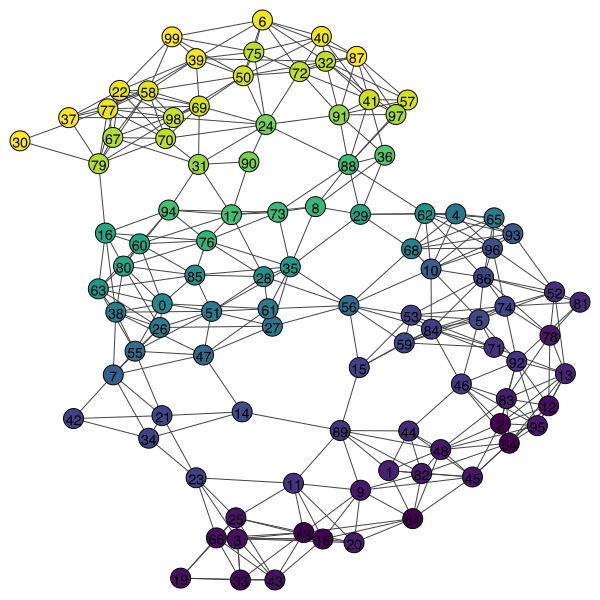

In [26]:
EXAMPLE = generate_aligned_user_space_mixed(100,1,3,0,0.03)
POL = SEQ_GENERATOR(EXAMPLE)
POL.calculate_similarity(method= 'euc')
POL.accept_deg_dist(np.random.randint(low = 1, high = 10, size = POL.user_space.shape[0]))
graph = POL.connect_sequential(HPOW= 100)
POL.PLOT(1)
ig.plot(POL.network, vertex_color = POL.network.vs["color"])

Observing the Non Polarized Topic


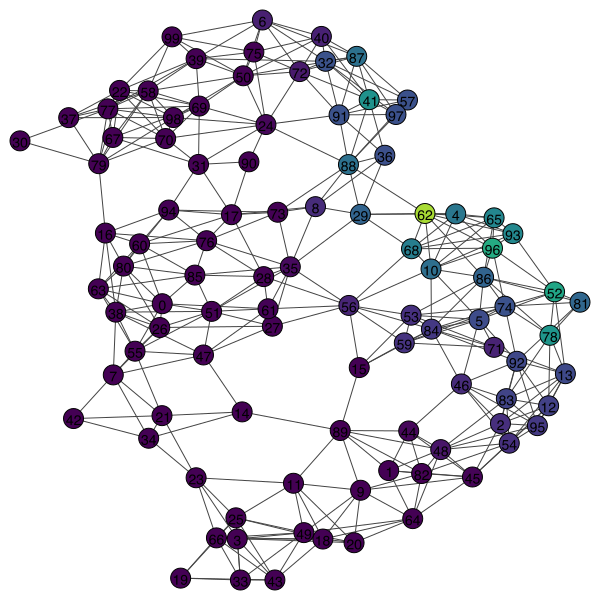

In [27]:
POL.PLOT(0)
ig.plot(POL.network, vertex_color = POL.network.vs["color"])

### 3 Polarized 1 Non Polarized Topic, Alignment 0.03, Homophily: Extremely Low (Controversal Topic)

Casting Votes...: 100%|██████████| 100/100 [00:00<00:00, 19589.48it/s]

Network Generated with 3 Polarized and 1 Non Polarized Topic with Alignment Parameter 0.03 and Homophily Parameter 0.3


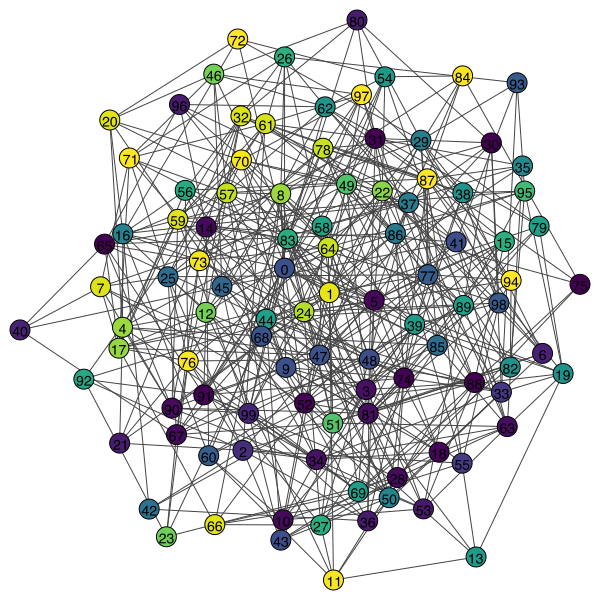

In [28]:
EXAMPLE = generate_aligned_user_space_mixed(100,1,3,0,0.03)
POL = SEQ_GENERATOR(EXAMPLE)
POL.calculate_similarity(method= 'euc')
POL.accept_deg_dist(np.random.randint(low = 1, high = 10, size = POL.user_space.shape[0]))
graph = POL.connect_sequential(HPOW= 0.3)
POL.PLOT(1)
print('Network Generated with 3 Polarized and 1 Non Polarized Topic with Alignment Parameter 0.03 and Homophily Parameter 0.3')
ig.plot(POL.network, vertex_color = POL.network.vs["color"])

### 3 Polarized 1 Non Polarized Topic, Alignment 0.03, Homophily: Extremely Strong (Controversal Topic)

Casting Votes...: 100%|██████████| 100/100 [00:00<00:00, 9515.64it/s]


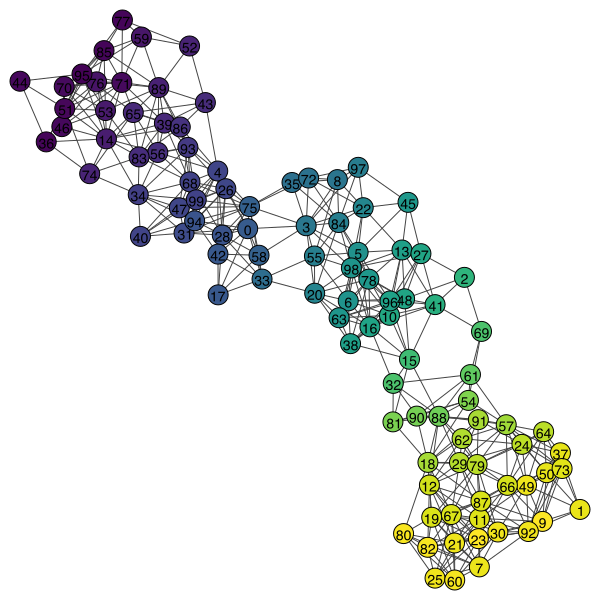

In [75]:
EXAMPLE = generate_aligned_user_space_mixed(100,1,20,0,0.01)
POL = SEQ_GENERATOR(EXAMPLE)
POL.calculate_similarity(method= 'euc')
POL.accept_deg_dist(np.random.randint(low = 1, high = 15, size = POL.user_space.shape[0]))
graph = POL.connect_sequential(HPOW= 3000)
POL.PLOT(1)
ig.plot(POL.network, vertex_color = POL.network.vs["color"])

Generating Extremely Polarized Societies is also possible. In this case, the nodes prefer not to connect.

<img src = "/Users/onurtuncaybal/Documents/PhD/Projects/EksiPol/Generators/IMAGE 2024-10-13 16:49:15.jpg">